In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('data/SouthAfricaCrimeStats.csv')

In [95]:
df.head(3)

,Nu,Unique,Province,Cluster,Station,Type,Crime Category,2005-2006,2006-2007,2007-2008,...,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,Position,Position Type Crime Category,Province.1,Station-Province
0,47891,Cape Town Central 17 Community Reported Crimes,Western Cape,Cape Town Central Cluster,Cape Town Central,Station,17 Community Reported Crimes,18312,17180,15606,...,14667,14596,14759,15775,15575,15191,1,1 Station 17 Community Reported Crimes,Cape Town Central,Western Cape
1,50805,Mitchells Plain 17 Community Reported Crimes,Western Cape,Mitchells Plain Cluster,Mitchells Plain,Station,17 Community Reported Crimes,19929,21864,21901,...,20700,19668,20967,20073,17664,14966,2,2 Station 17 Community Reported Crimes,Mitchells Plain,Western Cape
2,17529,Jhb Central 17 Community Reported Crimes,Gauteng,Jhb Central Cluster,Jhb Central,Station,17 Community Reported Crimes,21219,19693,17913,...,17176,15801,14251,12961,12842,13641,3,3 Station 17 Community Reported Crimes,Jhb Central,Gauteng


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53627 entries, 0 to 53626
Data columns (total 21 columns):
Nu                              53627 non-null int64
Unique                          53627 non-null object
Province                        53627 non-null object
Cluster                         53627 non-null object
Station                         53627 non-null object
Type                            53627 non-null object
Crime Category                  53627 non-null object
2005-2006                       53627 non-null int64
2006-2007                       53627 non-null int64
2007-2008                       53627 non-null int64
2008-2009                       53627 non-null int64
2009-2010                       53627 non-null int64
2010-2011                       53627 non-null int64
2011-2012                       53627 non-null int64
2012-2013                       53627 non-null int64
2013-2014                       53627 non-null int64
2014-2015                       53627

In [85]:
titles = list(df.columns)
dates = titles[7:17]
province = list(df.Province.value_counts().index)

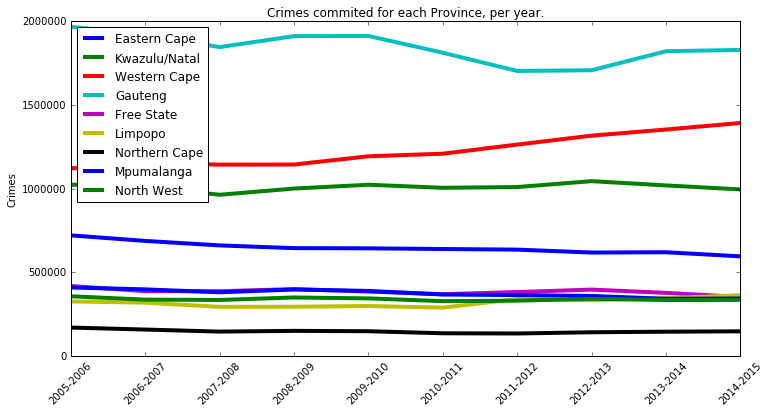

In [90]:
plt.figure(figsize=(12,6))

# Plot each province's crimes onto the same graph.
for i in range(len(province)):
    df[df['Province'] == province[i]][dates].sum().plot(kind='line', linewidth=4)

plt.xticks(rotation=45)
plt.legend((province), loc='upper left')
plt.title('Crimes commited for each Province, per year.')
plt.ylabel('Crimes')


It appears Northern Cape would be the province of least crimes, with Gauteng at the top and Western Cape on the rise. This doesn't however take into account the type of crimes being commited.

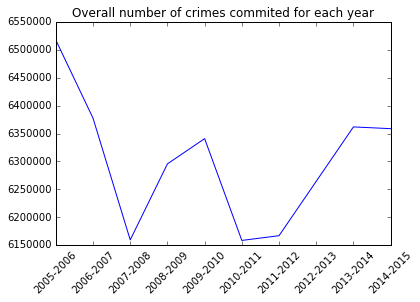

In [244]:
df[dates].sum().plot(kind='line')
plt.xticks(rotation=45)
plt.title('Overall number of crimes commited for each year')

In [115]:
# Population data taken from https://en.wikipedia.org/wiki/List_of_South_African_provinces_by_population
# Figures are for mid-2015. Only really comparable to the figures in column 2014-2015. 
province_population = {
                        'Gauteng':       13200300,
                        'Kwazulu/Natal': 10919100,
                        'Eastern Cape':   6916200,
                        'Western Cape':   6200100,
                        'Limpopo':        5726800,
                        'Mpumalanga':     4283900,
                        'North West':     3707100,
                        'Free State':     2817900,
                        'Northern Cape':  1185600
                      }

In [177]:
crimes_2015_df = pd.DataFrame(df.groupby('Province')['2014-2015'].sum())
crimes_2015_df.reset_index(inplace=True)
crimes_2015_df['Population'] = crimes_2015_df['Province'].map(province_population)
crimes_2015_df['Crime Ratio'] = crimes_2015_df['2014-2015']/crimes_2015_df['Population']

In [182]:
crimes_2015_df

,Province,2014-2015,Population,Crime Ratio
0,Eastern Cape,595952,6916200,0.086168
1,Free State,353548,2817900,0.125465
2,Gauteng,1829086,13200300,0.138564
3,Kwazulu/Natal,995671,10919100,0.091186
4,Limpopo,363847,5726800,0.063534
5,Mpumalanga,344201,4283900,0.080348
6,North West,335722,3707100,0.090562
7,Northern Cape,148011,1185600,0.124841
8,Western Cape,1392649,6200100,0.224617


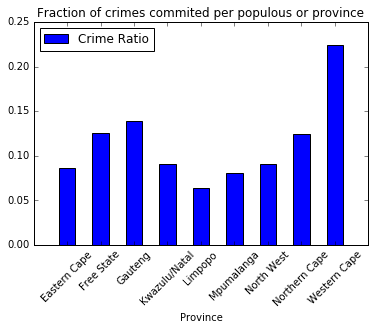

In [243]:
crimes_2015_df[['Crime Ratio','Province']].plot(kind='bar', x='Province')
plt.xticks(rotation=45)
plt.xlim(-1,len(crimes_2015_df.Province))
plt.title('Fraction of crimes commited per populous or province')

These numbers seem fairly high. 22% of people in Western Cape commited a serious crime in the years 2014-2015. Limpopo having the least at a still rather high 6%.

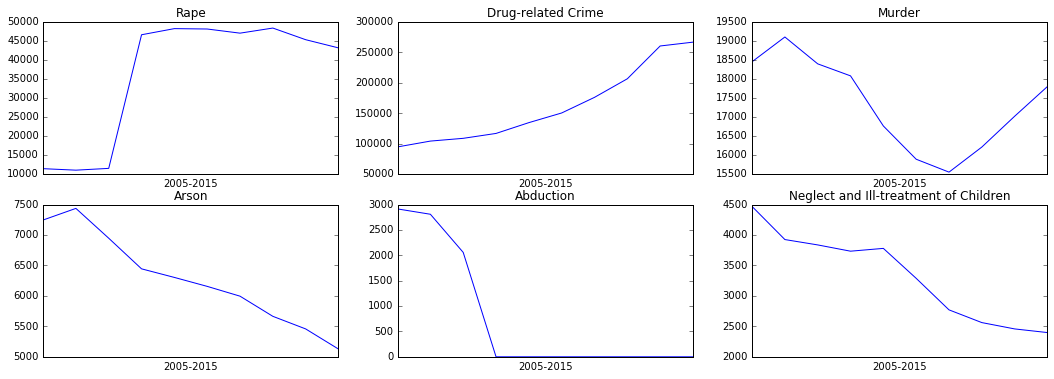

In [228]:
# Plotting line graphs for a select few types of crimes to get a sense of how they have changed over the course of ten years.
fig = plt.figure(figsize=(18,6))
ax1 = plt.subplot2grid((2,3),(0,0))


df[df['Crime Category'] == 'Rape'][dates].sum().plot(kind='line')
plt.tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off')
plt.xlabel('2005-2015')
plt.title('Rape')

ax2 = plt.subplot2grid((2,3),(0,1))
df[df['Crime Category'] == 'Drug-related crime'][dates].sum().plot(kind='line')
plt.tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off')
plt.xlabel('2005-2015')
plt.title('Drug-related Crime')

ax3 = plt.subplot2grid((2,3),(0,2))
df[df['Crime Category'] == 'Murder'][dates].sum().plot(kind='line')
plt.tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off')
plt.xlabel('2005-2015')
plt.title('Murder')

ax4 = plt.subplot2grid((2,3),(1,0))
df[df['Crime Category'] == 'Arson'][dates].sum().plot(kind='line')
plt.tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off')
plt.xlabel('2005-2015')
plt.title('Arson')

ax5 = plt.subplot2grid((2,3),(1,1))
df[df['Crime Category'] == 'Abduction'][dates].sum().plot(kind='line')
plt.tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off')
plt.xlabel('2005-2015')
plt.title('Abduction')

ax6 = plt.subplot2grid((2,3),(1,2))
df[df['Crime Category'] == 'Neglect and ill-treatment of children'][dates].sum().plot(kind='line')
plt.tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off')
plt.xlabel('2005-2015')
plt.title('Neglect and Ill-treatment of Children')



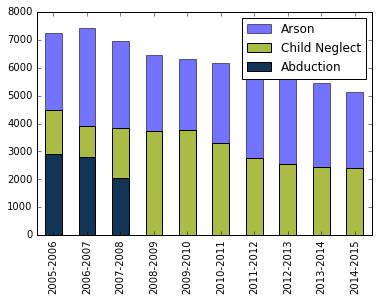

In [242]:
df[df['Crime Category'] == 'Arson'][dates].sum().plot(kind='bar', label='Arson', alpha=.55)
df[df['Crime Category'] == 'Neglect and ill-treatment of children'][dates].sum().plot(kind='bar', label='Child Neglect', color='#AABC45')
df[df['Crime Category'] == 'Abduction'][dates].sum().plot(kind='bar', color='#123456', label='Abduction')
plt.legend()